<a href="https://colab.research.google.com/github/julyanks/emotion_based_music/blob/main/4thsem_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
target='/content/drive/MyDrive/Colab Notebooks/archive1+2.zip'
new=zipfile.ZipFile(target)
new.extractall('/content/drive/MyDrive/destination')
new.close()

In [ ]:
import numpy as np
import os
import cv2

In [ ]:
data='/content/drive/MyDrive/destination'

sub_data=["happy","sad"]

In [ ]:
i=0
labels=[]
images=[]
last=[]
d1=[]

for category in sub_data:
  path=os.path.join(data,category)
  ind=sub_data.index(category)
  label=ind
  sub_data_img=os.listdir(path)

  for img in sub_data_img:
    ip=path+'/'+img
    print(ip+"\t"+str(label))

    img=cv2.imread(ip)
    img=cv2.resize(img,(100,100))
    
    images.append(img)
    labels.append(label)
    d1.append([img,label])
    i+=1
  last.append(i)



/content/drive/MyDrive/destination/happy/f44035c6ff386e2e0c9fa9a6262767f8.png	0
/content/drive/MyDrive/destination/happy/42751-claas-joy-happy-face-contentment-child-human-being-photocase-stock-photo-large.jpeg	0
/content/drive/MyDrive/destination/happy/happy-face-super-joyful-person-260nw-492254167.jpg	0
/content/drive/MyDrive/destination/happy/538692449_cb1853bb50.jpg	0
/content/drive/MyDrive/destination/happy/an-woman-happy-face-beautiful-smile-isolated-white-people-positive-142996803.jpg	0
/content/drive/MyDrive/destination/happy/5a9c3230b2d9360001dd82f4.w800.jpg	0
/content/drive/MyDrive/destination/happy/child-girl-blond-smile-happy-light-human-face.jpg	0
/content/drive/MyDrive/destination/happy/313625278.jpg	0
/content/drive/MyDrive/destination/happy/-happy-face-human-expressions-emotions-latin-model-beautiful-smile-150784563.jpg	0
/content/drive/MyDrive/destination/happy/girl-smiling-happy-face-wallpaper-preview.jpg	0
/content/drive/MyDrive/destination/happy/21090108-cute-smilin

In [ ]:
len(d1)

300

In [ ]:
import random
random.shuffle(d1)

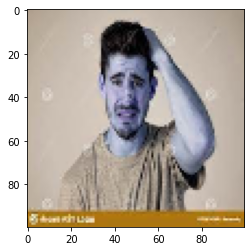

1


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(images[230] ,cmap='gray')

plt.show()
print(labels[230])

In [ ]:
x=[]
y=[]
for features,labels in d1:
  x.append(features)
  y.append(labels)


In [ ]:
x=np.array(x)
y=np.array(y)
x=x/255    #features scaling, lesser value- faster calculations

In [ ]:
x.shape


(300, 100, 100, 3)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =train_test_split(x,y,test_size=0.25,random_state=44)
print(len(xtrain))
print(len(xtest))

225
75


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
trainmodel=Sequential([
                       Conv2D(64,(3,3),activation='relu'),
                       MaxPooling2D((2,2)),

                      Conv2D(64,(3,3),activation='relu'),
                      MaxPooling2D((2,2)),
                       
                      Flatten(),
                  
                  Dense(128,input_shape=x.shape[1:],activation='relu'),
                
                   Dense(2,activation='sigmoid')
])


In [ ]:
trainmodel.compile(optimizer='adam',loss=['sparse_categorical_crossentropy'],metrics=['accuracy'])

In [ ]:
trainmodel.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=50)

Epoch 1/50
8/8 [==============================] - 6s 726ms/step - loss: 1.1422 - accuracy: 0.4667 - val_loss: 0.6681 - val_accuracy: 0.6933
Epoch 2/50
8/8 [==============================] - 6s 702ms/step - loss: 0.6077 - accuracy: 0.6533 - val_loss: 0.5806 - val_accuracy: 0.6667
Epoch 3/50
8/8 [==============================] - 6s 701ms/step - loss: 0.5753 - accuracy: 0.7022 - val_loss: 0.5294 - val_accuracy: 0.7333
Epoch 4/50
8/8 [==============================] - 7s 856ms/step - loss: 0.5048 - accuracy: 0.7911 - val_loss: 1.1654 - val_accuracy: 0.3467
Epoch 5/50
8/8 [==============================] - 7s 752ms/step - loss: 0.6476 - accuracy: 0.6222 - val_loss: 0.6576 - val_accuracy: 0.6800
Epoch 6/50
8/8 [==============================] - 6s 704ms/step - loss: 0.4876 - accuracy: 0.7689 - val_loss: 0.5392 - val_accuracy: 0.7333
Epoch 7/50
8/8 [==============================] - 6s 700ms/step - loss: 0.3919 - accuracy: 0.8311 - val_loss: 0.5409 - val_accuracy: 0.7067
Epoch 8/50
8/8 [====

In [ ]:
trainmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 33856)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
trainmodel.save("finalmodel.h5")


In [ ]:
from keras.models import load_model
loadingmodel=load_model("finalmodel.h5")

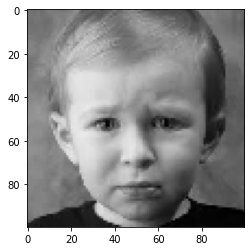

 oh ! you are looking sad


In [ ]:
from keras.preprocessing import image
test=image.load_img('/content/drive/MyDrive/sad2.jpg',target_size=(100,100))
plt.imshow(test)
plt.show()
test=image.img_to_array(test)
test=np.expand_dims(test,axis=0)
result=loadingmodel.predict(test)
np.save("emotion.npy",np.array([result]))
if(result[0][0]==1):
  pred=" oh ! you are looking sad"
  print(pred)
else:
  pred="oh ! you are looking happy"
  print(pred)

In [ ]:
import pandas as pd

In [ ]:
emotion=np.load("emotion.npy")

In [ ]:
if(emotion=="Happy"):
  df=pd.read_csv("/content/drive/MyDrive/Happy.csv")
else:
  df=pd.read_csv("/content/drive/MyDrive/Sad.csv")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


In [ ]:
df.head()

,Unnamed: 0,Name,Album,Artist,url
0,0,khairiyat,chhichhore,"arijit singh,pritam",https://open.spotify.com/track/5O932cZmzOZGOGZ...
1,1,mai dhoondne ko zamane mein,heartless,arijit singh,https://open.spotify.com/track/43YkTTlOD203o9E...
2,2,qafirana,keadrnath,"arijit singh, nikita gandhi",https://open.spotify.com/track/0xkGTPTijMU84dt...
3,3,titlian,titlian,afsana khan,https://open.spotify.com/track/1980E4Grgu5xAhN...
